<a href="https://colab.research.google.com/github/PristRawal/Deep_Learning/blob/main/Fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import numpy as np
import matplotlib.pyplot as plt

# Loading the dataset and converting to Tensor using transform

In [ ]:
train_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=transforms.ToTensor(),

)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=transforms.ToTensor(),

)


100%|██████████| 26421880/26421880 [00:04<00:00, 5874327.81it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 343840.29it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 6107708.94it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 4543829.33it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



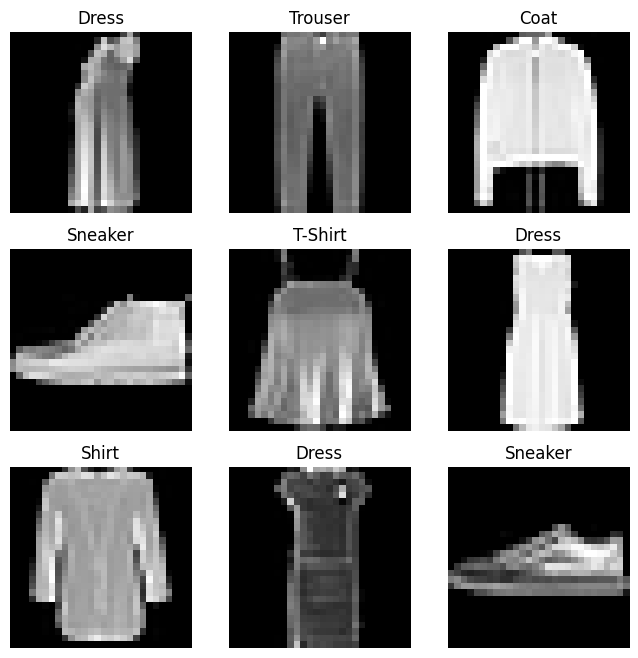

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
val=590
train_data[val][1]

6

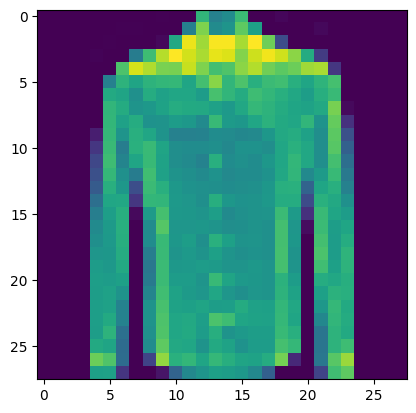

In [ ]:
a=train_data[val][0].reshape(28,28) #reshape should be done in order to display the image using Matplotlib
a.shape
plt.imshow(a)

In [ ]:
train_loader=DataLoader(train_data,batch_size=10,shuffle=True)
test_loader=DataLoader(test_data,batch_size=10,shuffle=False)

# Creating The Neural Network

In [ ]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN,self).__init__()
    self.conv1 = nn.Conv2d(1, 10, kernel_size=5) #Input channels=1, Output channels=10, kernel_size=5
    self.conv2 = nn.Conv2d(10, 20, kernel_size=5) #Input channels=10, Output channels=20, kernel_size=5
    self.conv2_drop = nn.Dropout2d() #Dropout layer used to prevent overfitting
    self.fc1 = nn.Linear(320, 120) #Fully connected layer 1
    self.fc2 = nn.Linear(120, 84) #Fully connected layer 2
    self.fc3 = nn.Linear(84, 10) #Output layer with 10 classes

  def forward(self,x):
    x = F.relu(F.max_pool2d(self.conv1(x), 2)) #Max pooling layer with kernel size of 2
    x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2)) #Max pooling layer with kernel size of 2
    x = x.view(-1, 320)  #Flattening layer
    x = F.relu(self.fc1(x)) # ReLU activation after fc1
    x = F.relu(self.fc2(x)) # ReLU activation after fc2
    x = self.fc3(x)
    return x



In [ ]:
torch.manual_seed(41)
model=CNN()

In [ ]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

# Train and Test

In [ ]:
import time
start_time=time.time()

#Creating variables to track things
epochs=5
train_loss=[]
test_loss=[]
train_correct=[]
test_correct=[]


for i in range(epochs):
  trn_corr=0
  tst_corr=0

  for b,(x_train , y_train) in enumerate(train_loader):

     b+=1 #just to start counting from 1 and not from zero

     y_pred = model(x_train) #Forward propagation   #If only image is passed then how does model know about labels????
     #print(f'Value of y_pred is:{y_pred}')

     loss = criterion(y_pred, y_train) #Shows the difference between predicted value(y_pred) from our model and actual value present in y_train

     predicted = torch.max(y_pred.data, 1)[1]
     #print(f'The label is :{predicted}')

     batch_corr=(predicted==y_train).sum()
     trn_corr+=batch_corr

     optimizer.zero_grad()
     loss.backward()
     optimizer.step()

     #Printing some of the results
     if b%100 == 0:
      print(f'Epoch:{i}, Batch:{b}, Loss:{loss.item()}')

  train_loss.append(loss)
  train_correct.append(trn_corr)

     #Test

  with torch.no_grad(): #No gradient so that we don't update our weights and biases with Testing
    for b, (X_test, y_test) in enumerate(test_loader):
      y_val=model(X_test)
      predicted=torch.max(y_val.data,1)[1]
      tst_corr+=(predicted==y_test).sum()

  loss=criterion(y_val,y_test)

  test_loss.append(loss)
  test_correct.append(tst_corr)



current_time=time.time()
total=current_time-start_time
print(f'Training Took:{total/60}minutes')


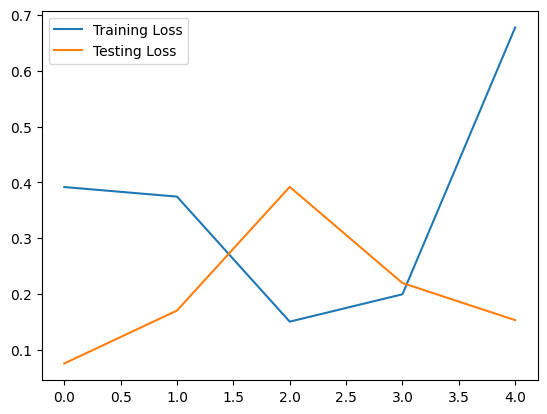

In [ ]:
#Graph the Loss at each epoch
#train_loss=[m.item() for m in train_loss]
train_loss=np.array(train_loss)
test_loss=np.array(test_loss)
plt.plot(train_loss,label='Training Loss')
plt.plot(test_loss,label='Testing Loss')
plt.legend()

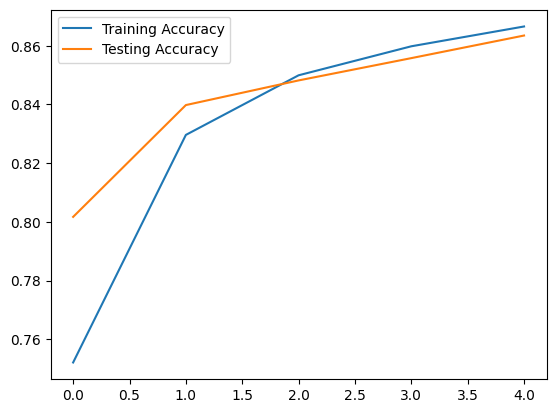

In [ ]:
plt.plot([m/len(train_data) for m in train_correct],label='Training Accuracy')
plt.plot([m/len(test_data) for m in test_correct],label='Testing Accuracy')
plt.legend()

# Testing the model

In [ ]:
new_test_data=DataLoader(test_data,batch_size=100,shuffle=True)

In [ ]:
model.eval()
with torch.no_grad():
      correct=0
      for b, (X_test, y_test) in enumerate(new_test_data):
        y_val=model(X_test)
        predicted=torch.max(y_val.data,1)[1]
        correct+=(predicted==y_test).sum()
print(correct.item()/10000)

0.8812


In [ ]:
test_data.data.shape

torch.Size([10000, 28, 28])

In [ ]:
v=test_data[4444][0].reshape(28,28)

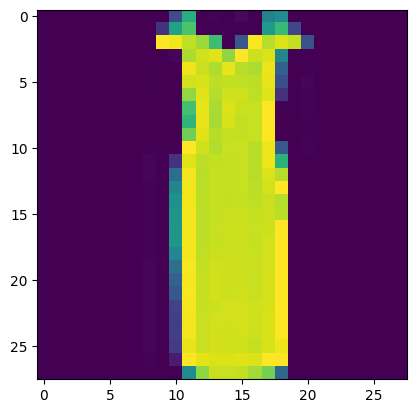

In [ ]:
plt.imshow(v)

In [ ]:
model.eval()

with torch.no_grad():
  label_test=model(v.view(1,1,28,28))

#print(label_test)
label_test_scalar = label_test.tolist()
predication = np.argmax(label_test_scalar)
print(f'The predicted label is:{predication}')


The predicted label is:3


The label is:3


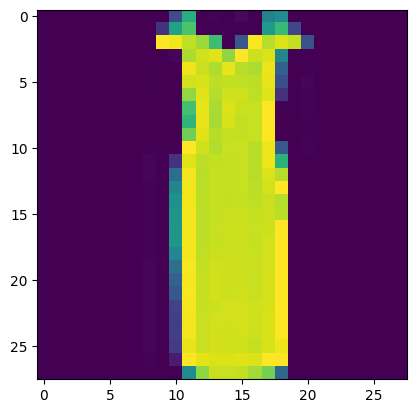

In [ ]:
p=4444
img=test_data[p][0].reshape(28,28)
plt.imshow(img)

label=test_data[p][1]
print(f'The label is:{label}')